Data Loaded Successfully!

  CustomerID ProductID     Category  PurchaseAmount PurchaseDate
0       C001      P001  Electronics           15000   2024-01-15
1       C002      P002      Fashion            2500   2024-01-16
2       C003      P003    Groceries             500   2024-01-17
3       C001      P002      Fashion            3000   2024-02-10
4       C004      P004  Electronics           20000   2024-02-12

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      6 non-null      object
 1   ProductID       6 non-null      object
 2   Category        6 non-null      object
 3   PurchaseAmount  6 non-null      int64 
 4   PurchaseDate    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 372.0+ bytes
None

Missing Values:
CustomerID        0
ProductID         0
Category          0
PurchaseAmount    0
Pur

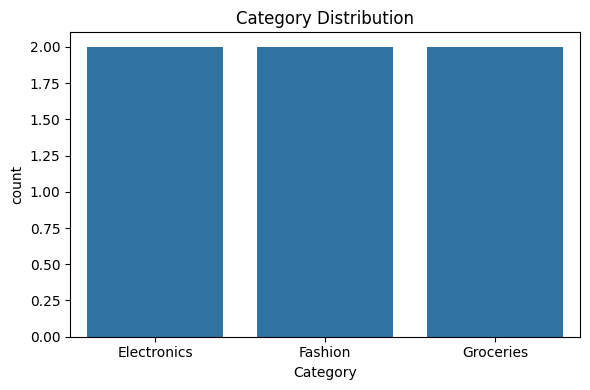


Cluster Summary:
         PurchaseAmount
Cluster                
0                1675.0
1               20000.0
2               15000.0


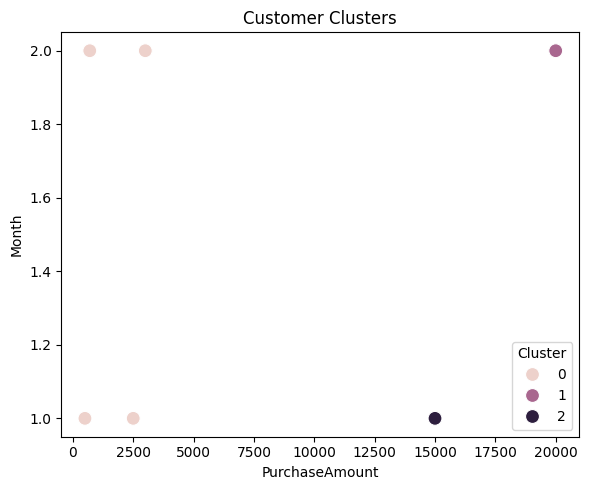

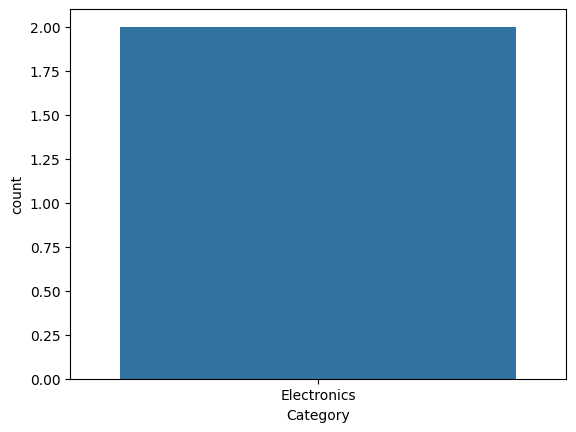


Silhouette Score: 0.41


['kmeans_model.joblib']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import joblib

df = pd.read_csv(r"C:\Users\Narendra kumar\Downloads\customer_segmentation_recommendation_demo.zip")
print("\nData Loaded Successfully!\n")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isna().sum())

df['PurchaseAmount'] = df['PurchaseAmount'].fillna(df['PurchaseAmount'].median())
df['Category'] = df['Category'].fillna("Unknown")
df.drop_duplicates(inplace=True)

print("\nDataset Shape:", df.shape)
print(df.describe())

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['Month'] = df['PurchaseDate'].dt.month
df['Day'] = df['PurchaseDate'].dt.day
df['Year'] = df['PurchaseDate'].dt.year

label = LabelEncoder()
df['Category_encoded'] = label.fit_transform(df['Category'])

df['HighValueCustomer'] = df['PurchaseAmount'].apply(lambda x: 1 if x > df['PurchaseAmount'].median() else 0)

features = df[['PurchaseAmount', 'Category_encoded', 'Month']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("\nCluster Summary:")
print(df.groupby('Cluster')[['PurchaseAmount']].mean())

print("\nCUSTOMER SEGMENT PROFILES:")
for c in sorted(df['Cluster'].unique()):
    seg = df[df['Cluster'] == c]
    print(f"\nSegment {c}:")
    print(f"Average Spend: {seg['PurchaseAmount'].mean():.2f}")
    print(f"Top Category: {seg['Category'].mode()[0]}")
    print(f"Monthly Peak: {seg['Month'].mode()[0]}")

def recommend(category):
    if category in ["Electronics", "Gadgets"]:
        return "Recommended: Mobile Accessories / Smart Devices"
    elif category in ["Clothing", "Fashion"]:
        return "Recommended: Shoes / Fashion Accessories"
    elif category in ["Groceries"]:
        return "Recommended: Household Essentials"
    else:
        return "Recommended: Popular Trending Products"

df['Recommendation'] = df['Category'].apply(recommend)
print(df[['Category', 'Recommendation']].head())

plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df)
plt.title("Category Distribution")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='PurchaseAmount', y='Month', hue='Cluster', s=120)
plt.title("Customer Clusters")
plt.show()

sil_score = silhouette_score(scaled_features, df['Cluster'])
db_score = davies_bouldin_score(scaled_features, df['Cluster'])

print(f"\nSilhouette Score: {sil_score:.2f}")
print(f"Davies-Bouldin Score: {db_score:.2f}")

joblib.dump(label, "label_encoder.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(kmeans, "kmeans_model.joblib")

print("\nModels saved successfully.")
